2023-03-19 22:06:43.289550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 22:06:43.467854: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-19 22:06:43.503902: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 22:06:43.503922: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

Tensorflow version: 2.11.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False
['IMG_20211112_114139_88352975-3715-4e48-9479-a9ce60ef7989.Png', 'IMG_20210428_084524_e3a050ca-7306-49ac-8794-ec505d86d296.jpg', 'IMG_20210626_074024_9ca6ffcf-4964-448e-b50e-aa473b58c278.jpg', 'IMG_20220128_105507_4b4f2f6c-29ee-4f61-bde2-ad69839c5df6.Png', 'IMG_20210408_084455_9f66917d-072d-4daf-b638-2e118fff3ce0.jpg', 'IMG_20211117_085742_a96596b0-28b9-4fa5-8ad4-ffbbc5630773.Png', 'IMG_20211112_114219_9bd27126-6462-472e-888a-1fb52957123b.Png', 'IMG_20210820_100537_a09dc794-72dd-4fe0-a8a6-7419af84c997.jpg', 'IMG_20210513_075007_a0388ab1-d94b-485b-a2ba-51af2a38451b.jpg', 'IMG_20210729_082111_e245d922-90a1-4608-94dc-eacf976a7908.jpg']
['IMG_20220201_092455_7968f6a2-52d0-4c26-87f9-6fa811c8354f.Png', 'IMG_20210807_085112_1001d073-eeea-4ab5-800f-ab6af8732f5f.jpg', 'IMG_20211030_100853_397b03a0-605c-4405-af1a-6349d89d1f0c.Png', 'IMG_20211009_083125_f7d5d42b-a529-4b4

2023-03-19 22:06:45.420312: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 22:06:45.422635: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-19 22:06:45.422645: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-19 22:06:45.422657: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (elpackoG5): /proc/driver/nvidia/version does not exist


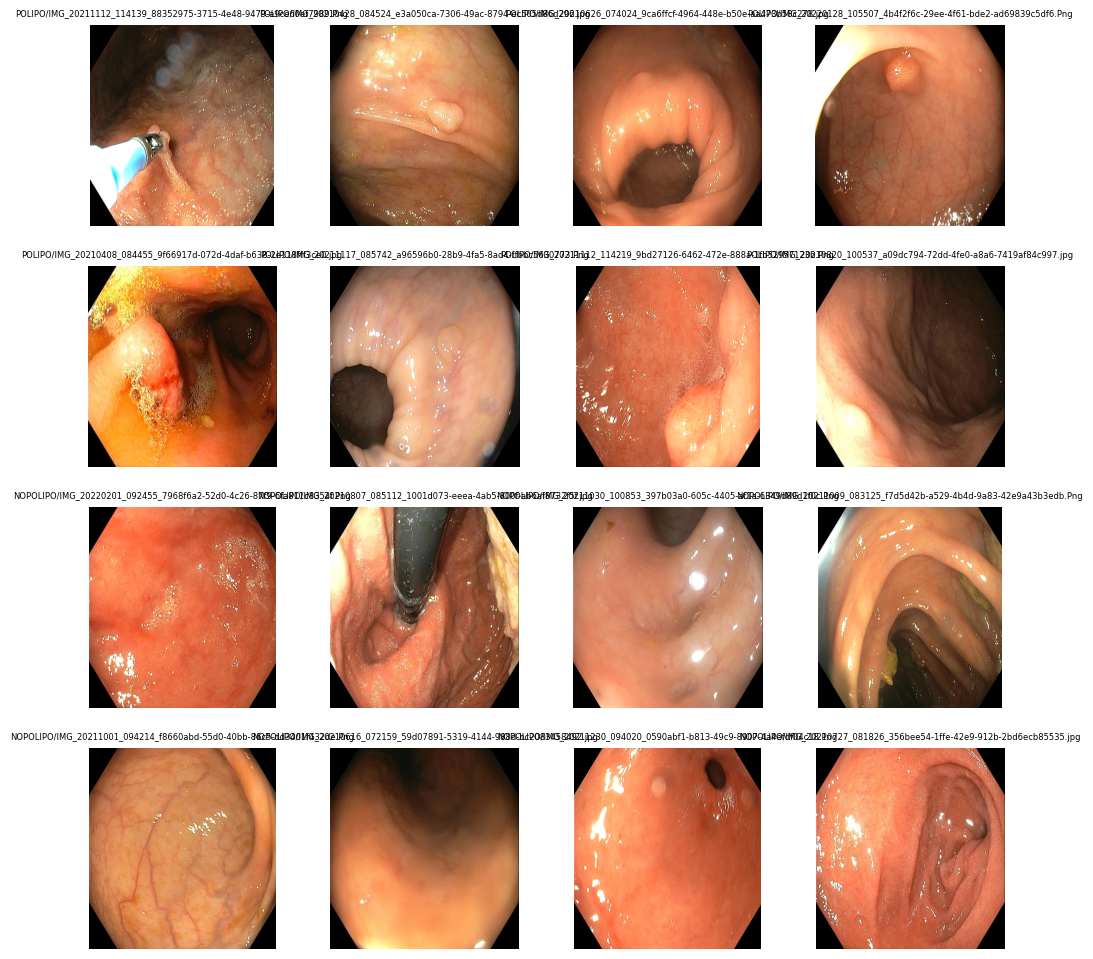

Found 658 images belonging to 2 classes.
Found 164 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


(200, 200, 3)

In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from medios import get_medios_polipos_path

# creating models directory
import os

BASE_DIR = "/home/elpacko/Gastroclub/"
# checking TensorFlow version and GPU usage
print('Tensorflow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

main_dir = get_medios_polipos_path()
# Setting path to the training directory
train_dir = os.path.join(main_dir, 'train')

# Setting path to the test directory
test_dir = os.path.join(main_dir, 'test')

# Directory with train POLIP images
train_POLIP_dir = os.path.join(train_dir, 'POLIPO')

# Directory with train normal images
train_normal_dir = os.path.join(train_dir, 'NOPOLIPO')

# Directory with test POLIP image
test_POLIP_dir = os.path.join(test_dir, 'POLIPO')

# Directory with test normal image
test_normal_dir = os.path.join(test_dir, 'NOPOLIPO')

# Creating a list of filenames in each directory
train_POLIP_names = os.listdir(train_POLIP_dir)
print(train_POLIP_names[:10])  # printing a list of the first 10 filenames

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_POLIP_names = os.listdir(test_POLIP_dir)
print(test_POLIP_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

# Printing total number of images present in each set
print('Total no of images in training set:', len(train_POLIP_names
                                                + train_normal_names))
print("Total no of images in test set:", len(test_POLIP_names
                                            + test_normal_names))

# Data Visualization
import matplotlib.image as mpimg
# Setting the no of rows and columns
ROWS = 4
COLS = 4
# Setting the figure size
fig = plt.gcf()
# get current figure; allows us to get a reference to current figure when using pyplot
fig.set_size_inches(12, 12)


# get the directory to each image file in the trainset
POLIP_pic = [os.path.join(train_POLIP_dir, filename) for filename in train_POLIP_names[:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[:8]]
print(POLIP_pic)
print(normal_pic)
# merge POLIP and normal lists
merged_list = POLIP_pic + normal_pic
print(merged_list)

# Plotting the images in the merged list
for i, img_path in enumerate(merged_list):
    # getting the filename from the directory
    data = img_path.split('/', 6)[6]
    # creating a subplot of images with the no. of rows and colums with index no
    sp = plt.subplot(ROWS, COLS, i+1)
    # turn off axis
    sp.axis('Off')
    # reading the image data to an array
    img = mpimg.imread(img_path)
    # setting title of plot as the filename
    sp.set_title(data, fontsize=6)
    # displaying data as image
    plt.imshow(img, cmap='gray')
    
plt.show()  # display the plot


# Data Preprocessing and Augmentation
# Generate training, testing and validation batches
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,  # using 20% of training data for validation 
                                zoom_range=0.2,
                                horizontal_flip=True)
dgen_validation = ImageDataGenerator(rescale=1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

# Awesome HyperParameters!!!
TARGET_SIZE = (200, 200)
BATCH_SIZE = 32
CLASS_MODE = 'binary'  # for two classes; categorical for over 2 classes

# Connecting the ImageDataGenerator objects to our dataset
train_generator = dgen_train.flow_from_directory(train_dir,
                                                target_size=TARGET_SIZE,
                                                subset='training',
                                                batch_size=BATCH_SIZE,
                                                class_mode=CLASS_MODE)

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size=TARGET_SIZE,
                                                      subset='validation',
                                                      batch_size=BATCH_SIZE,
                                                      class_mode=CLASS_MODE)
test_generator = dgen_test.flow_from_directory(test_dir,
                                              target_size=TARGET_SIZE,
                                              batch_size=BATCH_SIZE,
                                              class_mode=CLASS_MODE)

# Get the class indices
train_generator.class_indices

# Get the image shape
train_generator.image_shape


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 64)        0

Epoch 1/200
21/21 [==============================] - 10s 467ms/step - loss: 1.8230 - accuracy: 0.5243 - val_loss: 0.6923 - val_accuracy: 0.6402
Epoch 2/200
21/21 [==============================] - 9s 426ms/step - loss: 0.6877 - accuracy: 0.5243 - val_loss: 0.6837 - val_accuracy: 0.5427
Epoch 3/200
21/21 [==============================] - 9s 428ms/step - loss: 0.6798 - accuracy: 0.5593 - val_loss: 0.6818 - val_accuracy: 0.5366
Epoch 4/200
21/21 [==============================] - 9s 423ms/step - loss: 0.6834 - accuracy: 0.5714 - val_loss: 0.6769 - val_accuracy: 0.5305
Epoch 5/200
21/21 [==============================] - 9s 425ms/step - loss: 0.6842 - accuracy: 0.5714 - val_loss: 0.6675 - val_accuracy: 0.5976
Epoch 6/200
21/21 [==============================] - 9s 441ms/step - loss: 0.6800 - accuracy: 0.5502 - val_loss: 0.6515 - val_accuracy: 0.6646
Epoch 7/200
21/21 [==============================] - 9s 423ms/step - loss: 0.6582 - accuracy: 0.6018 - val_loss: 1.2082 - val_accuracy: 0.530

Text(0.5, 0, 'epoch')

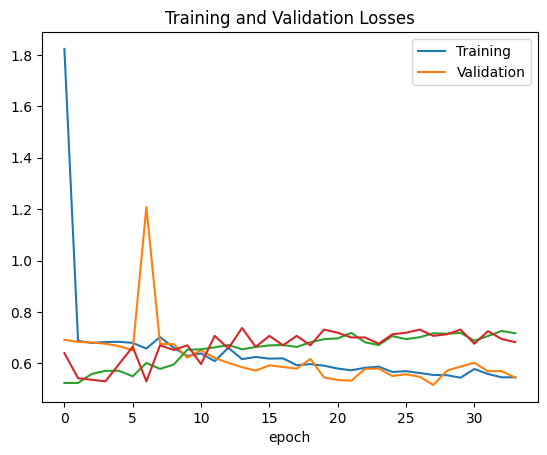

In [2]:

# Building CNN Model
model = Sequential()
model.add(Conv2D(32, (5,5), padding='same', activation='relu',
              input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Compile the Model
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(train_generator,
        epochs=200,
        validation_data=validation_generator,
        callbacks=[
        # Stopping our training if val_accuracy doesn't improve after 20 epochs
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                        patience=20),
        # Saving the best weights of our model in the model directory

        # We don't want to save just the weight, but also the model architecture
        tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                        save_best_only=True,
                                        save_weights_only=False,
                                        monitor='val_accuracy'
                                          )
  ])



history.history.keys()

# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

# Plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')


7/7 [==============================] - 1s 112ms/step - loss: 0.6804 - accuracy: 0.7059
Test loss: 0.680371105670929 Test Acc: 0.7058823704719543
1/1 [==============================] - 0s 54ms/step
polipo_04.png SIN POLIPO


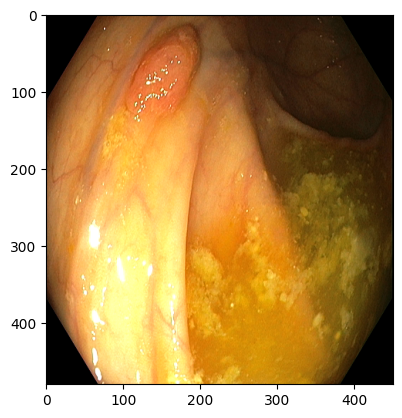

1/1 [==============================] - 0s 17ms/step
poliponline.jpeg SIN POLIPO


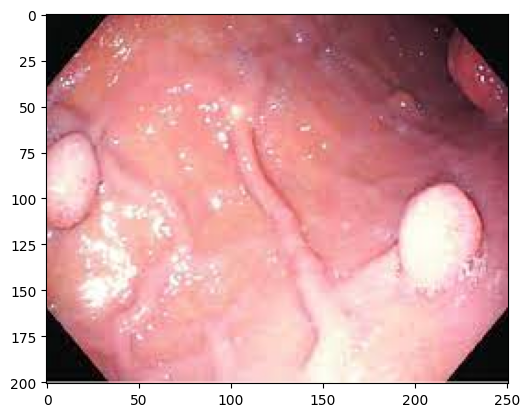

1/1 [==============================] - 0s 18ms/step
Polyp_photo-330x330-5122.jpg SIN POLIPO


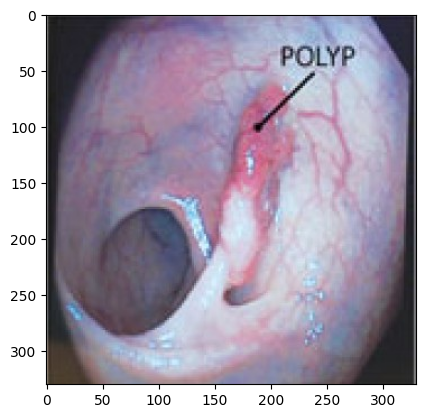

1/1 [==============================] - 0s 17ms/step
polyponline.jpeg SIN POLIPO


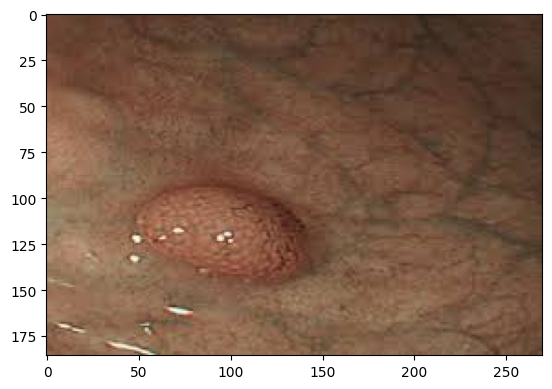

1/1 [==============================] - 0s 18ms/step
polipo_02.png SIN POLIPO


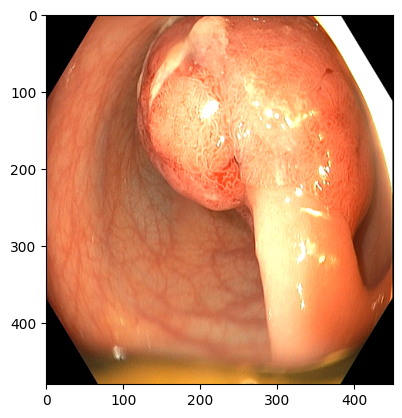

1/1 [==============================] - 0s 18ms/step
polyp-on-the-colon-endoscopy-CT58NE.jpg SIN POLIPO


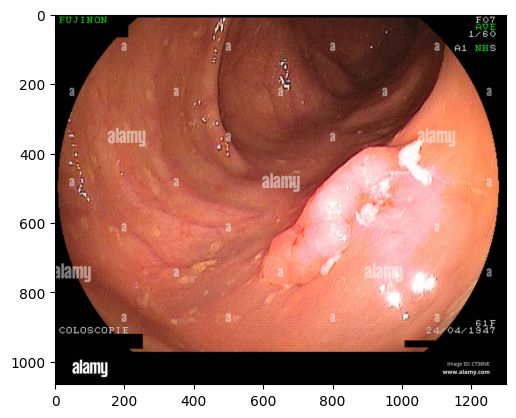

1/1 [==============================] - 0s 17ms/step
nopolipo03.png SIN POLIPO


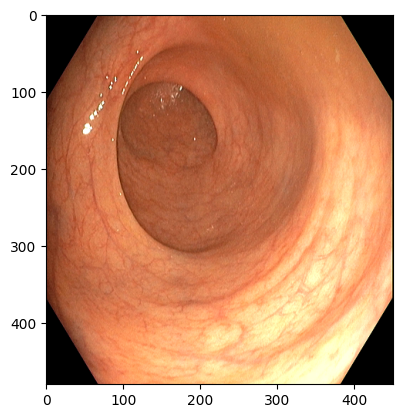

1/1 [==============================] - 0s 17ms/step
polyponline.webp SIN POLIPO


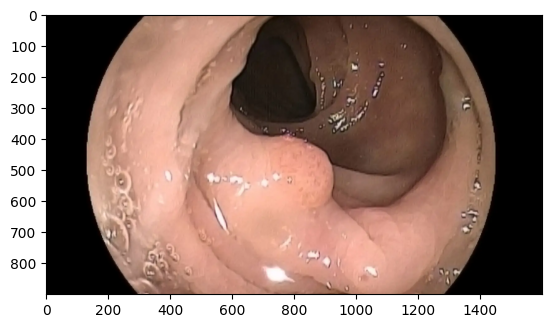

1/1 [==============================] - 0s 18ms/step
duodeno_01.png SIN POLIPO


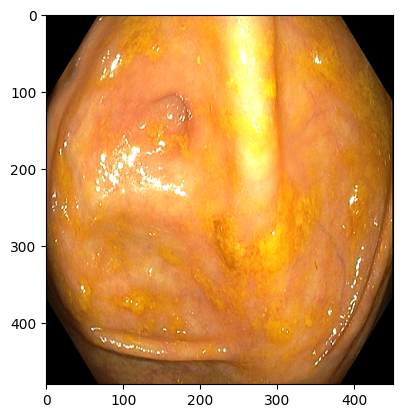

1/1 [==============================] - 0s 17ms/step
online_polip.jpeg SIN POLIPO


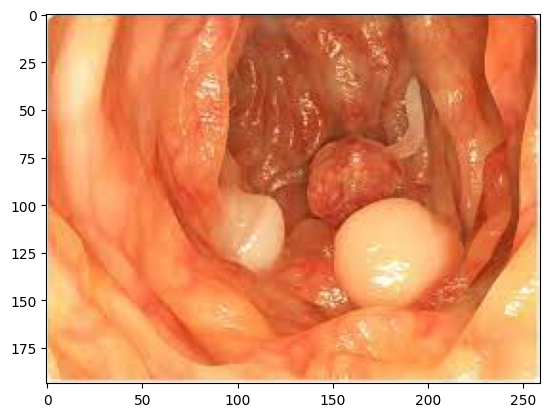

1/1 [==============================] - 0s 18ms/step
nopolipo01.png SIN POLIPO


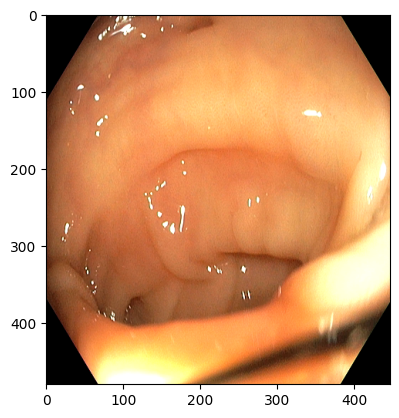

1/1 [==============================] - 0s 18ms/step
nopolipo02.png SIN POLIPO


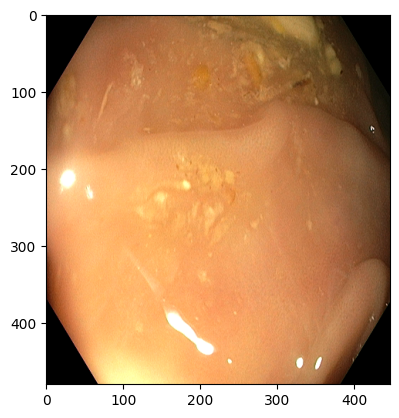

1/1 [==============================] - 0s 19ms/step
polipo_03.png SIN POLIPO


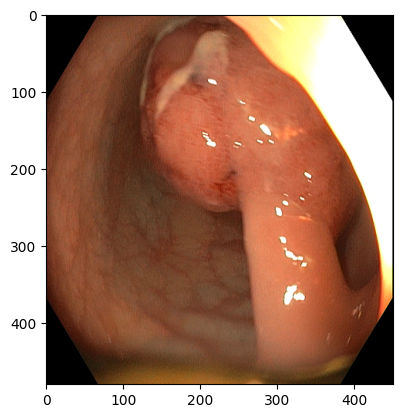

1/1 [==============================] - 0s 17ms/step
polipo_01.png SIN POLIPO


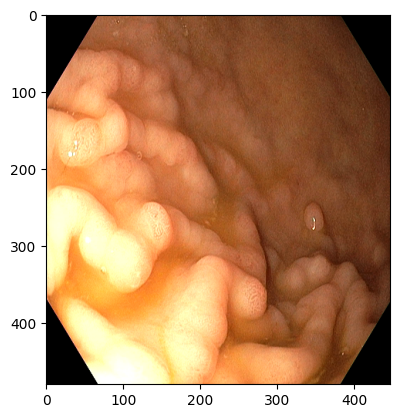

1/1 [==============================] - 0s 18ms/step
polyponline03.jpg SIN POLIPO


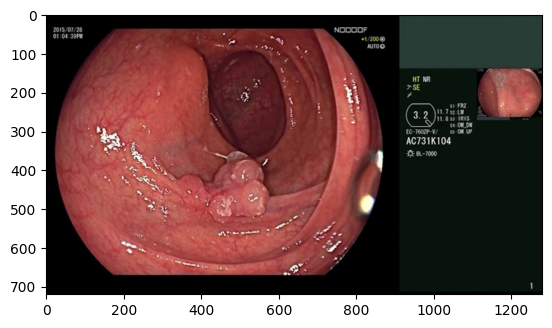

In [3]:
# loading the best perfoming model

model = tf.keras.models.load_model('models/model_0.780.h5')

# Getting test accuracy and loss
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

import matplotlib.pyplot as plt
import matplotlib.image as mpimg



files = os.listdir(os.path.join(BASE_DIR, 'new'))
for file in files:
    # Making a Single Prediction
    import numpy as np
    from keras.preprocessing import image
    from keras.utils import load_img, img_to_array
    # load and resize image to 200x200
    filepath = os.path.join(BASE_DIR, 'new', file)
    test_image = load_img(filepath,
                              target_size=(200,200))

    # convert image to numpy array
    images = img_to_array(test_image)
    # expand dimension of image
    images = np.expand_dims(images, axis=0)
    # making prediction with model
    prediction = model.predict(images)
    
    
    if prediction == 1:
        print(f'{file} POLIPO')
    else:
        print(f'{file} SIN POLIPO')
    img = mpimg.imread(filepath)
    imgplot = plt.imshow(img)
    plt.show()

